In [62]:
# instalações das bibliotecas necessárias para criar o modelo naive bayes 
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score
from yellowbrick.classifier import ConfusionMatrix  

In [63]:
# carregamento da base de dados
credito = pd.read_csv('Credit.csv')
credito.shape

(1000, 21)

In [64]:
credito.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,6,'critical/other existing credit',radio/tv,1169,'no known savings',>=7,4,'male single',none,...,'real estate',67,none,own,2,skilled,1,yes,yes,good
1,0<=X<200,48,'existing paid',radio/tv,5951,<100,1<=X<4,2,'female div/dep/mar',none,...,'real estate',22,none,own,1,skilled,1,none,yes,bad
2,'no checking',12,'critical/other existing credit',education,2096,<100,4<=X<7,2,'male single',none,...,'real estate',49,none,own,1,'unskilled resident',2,none,yes,good
3,<0,42,'existing paid',furniture/equipment,7882,<100,4<=X<7,2,'male single',guarantor,...,'life insurance',45,none,'for free',1,skilled,2,none,yes,good
4,<0,24,'delayed previously','new car',4870,<100,1<=X<4,3,'male single',none,...,'no known property',53,none,'for free',2,skilled,2,none,yes,bad


In [65]:
#formato de matriz
previsores = credito.iloc[:,0:20].values
classe = credito.iloc[:,20].values


In [66]:
# Transformação dos atributos categóricos em atributos numéricos, passando o índice de cada coluna categórica
# Precisamos criar um objeto para cada atributo categórico, pois na sequência vamos executar o processo de encoding novamente para o registro de teste
# Se forem utilizados objetos diferentes, o número atribuído a cada valor poderá ser diferente, o que deixará o teste inconsistente
labelencoder1 = LabelEncoder()
previsores[:,0] = labelencoder1.fit_transform(previsores[:,0])

labelencoder2 = LabelEncoder()
previsores[:,2] = labelencoder2.fit_transform(previsores[:,2])

labelencoder3 = LabelEncoder()
previsores[:, 3] = labelencoder3.fit_transform(previsores[:, 3])

labelencoder4 = LabelEncoder()
previsores[:, 5] = labelencoder4.fit_transform(previsores[:, 5])

labelencoder5 = LabelEncoder()
previsores[:, 6] = labelencoder5.fit_transform(previsores[:, 6])

labelencoder6 = LabelEncoder()
previsores[:, 8] = labelencoder6.fit_transform(previsores[:, 8])

labelencoder7 = LabelEncoder()
previsores[:, 9] = labelencoder7.fit_transform(previsores[:, 9])

labelencoder8 = LabelEncoder()
previsores[:, 11] = labelencoder8.fit_transform(previsores[:, 11])

labelencoder9 = LabelEncoder()
previsores[:, 13] = labelencoder9.fit_transform(previsores[:, 13])

labelencoder10 = LabelEncoder()
previsores[:, 14] = labelencoder10.fit_transform(previsores[:, 14])

labelencoder11 = LabelEncoder()
previsores[:, 16] = labelencoder11.fit_transform(previsores[:, 16])

labelencoder12 = LabelEncoder()
previsores[:, 18] = labelencoder12.fit_transform(previsores[:, 18])

labelencoder13 = LabelEncoder()
previsores[:, 19] = labelencoder13.fit_transform(previsores[:, 19])

In [67]:
# Divisão da base de dados entre treinamento e teste (30% para testar e 70% para treinar)
X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(previsores,
                                                                    classe,
                                                                    test_size = 0.3,
                                                                    random_state = 0)
X_teste

array([[2, 36, 3, ..., 1, 1, 1],
       [0, 9, 3, ..., 2, 0, 0],
       [0, 18, 3, ..., 1, 1, 1],
       ...,
       [0, 24, 1, ..., 1, 0, 1],
       [1, 27, 4, ..., 1, 1, 1],
       [1, 12, 3, ..., 1, 0, 1]], dtype=object)

In [68]:
#Criação e treinamento do modelo(geração da tabela de probabilidades)
naive_bayes = GaussianNB()
naive_bayes.fit(X_treinamento, y_treinamento)

GaussianNB()

In [69]:
#Previsões utilizando os registros de teste
previsoes = naive_bayes.predict(X_teste)

In [70]:
#gerando uma matriz de confusão para comparar os resultados 
confusao = confusion_matrix(y_teste, previsoes)
confusao

array([[ 41,  45],
       [ 42, 172]], dtype=int64)

In [71]:
#taxa de acerto do modelo
taxa_acerto = accuracy_score(y_teste, previsoes)
taxa_acerto

0.71

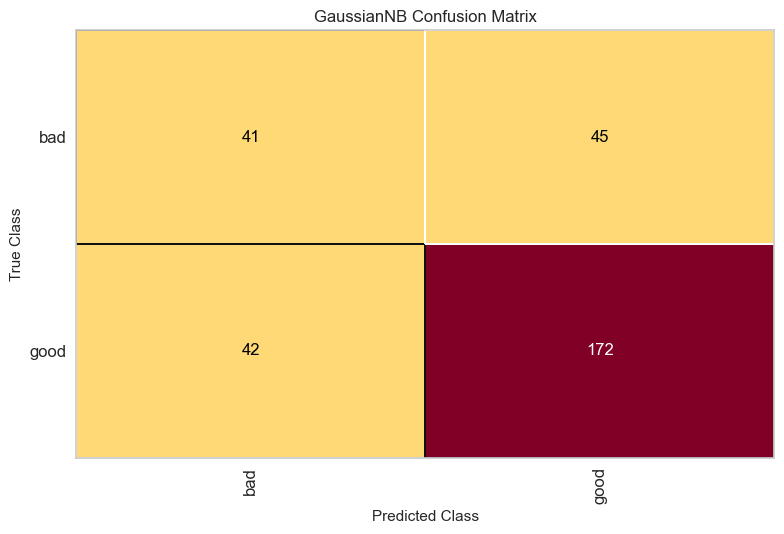

<Axes: title={'center': 'GaussianNB Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [72]:
v = ConfusionMatrix(GaussianNB())  
v.fit(X_treinamento, y_treinamento)
v.score(X_teste, y_teste)
v.poof()

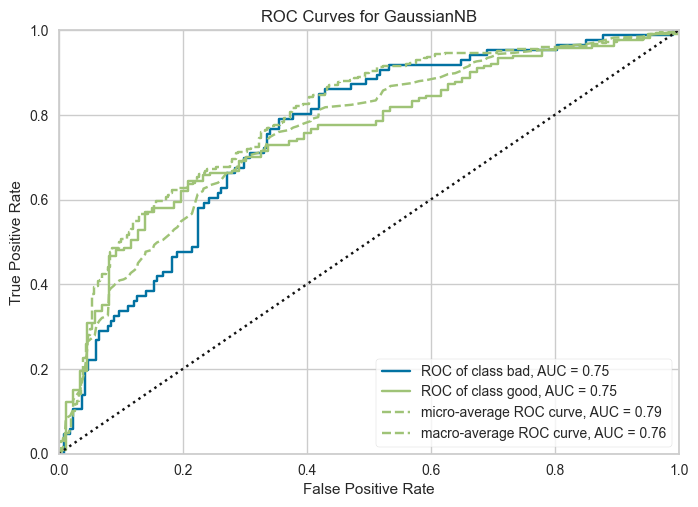

<Axes: title={'center': 'ROC Curves for GaussianNB'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [73]:
from sklearn.preprocessing import LabelBinarizer

# Instanciando o modelo
model = GaussianNB()

# Ajustando os dados de treinamento ao modelo
model.fit(X_treinamento, y_treinamento)

# Instanciando o visualizador da curva ROC
roc_auc = ROCAUC(model)

# Convertendo os rótulos para binário
binarizer = LabelBinarizer()
y_treinamento_bin = binarizer.fit_transform(y_treinamento)
y_teste_bin = binarizer.transform(y_teste)

# Ajustando os dados de treinamento ao visualizador
roc_auc.fit(X_treinamento, y_treinamento_bin)

# Avaliando o modelo com os dados de teste
roc_auc.score(X_teste, y_teste_bin)

# Exibindo a curva ROC
roc_auc.poof()



C:\Users\55219\AppData\Local\Temp\ipykernel_9112\3629517932.py:8: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




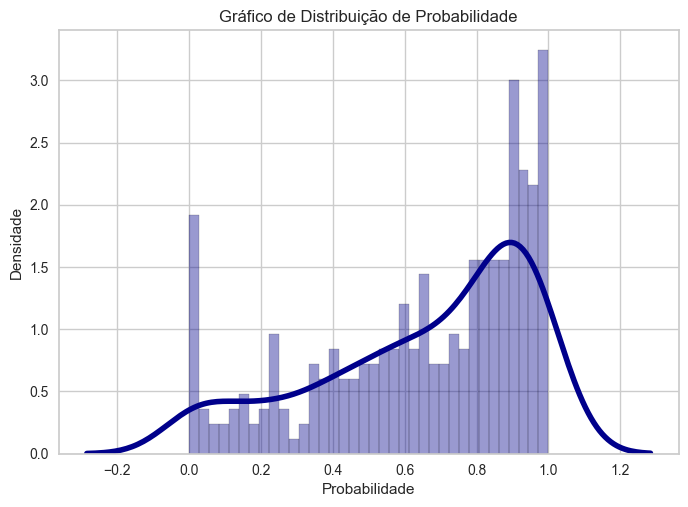

In [74]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculando as probabilidades preditas
y_prob = model.predict_proba(X_teste)[:, 1]

# Criando o gráfico de distribuição de probabilidade
sns.distplot(y_prob, hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

# Adicionando títulos e rótulos
plt.title('Gráfico de Distribuição de Probabilidade')
plt.xlabel('Probabilidade')
plt.ylabel('Densidade')

# Exibindo o gráfico
plt.show()

In [ ]:
#previsão de um novo registro
novo_credito = pd.read_csv('NovoCredit.csv')
novo_credito.shape

(1, 20)

In [ ]:
#Usando o mesmo objeto que foi criado anteriormente para transformar o atributo categórico em numérico
novo_credito = novo_credito.iloc[:,0:20].values
novo_credito[:,0] = labelencoder1.transform(novo_credito[:,0])
novo_credito[:,2] = labelencoder2.transform(novo_credito[:,2])
novo_credito[:,3] = labelencoder3.transform(novo_credito[:,3])
novo_credito[:,5] = labelencoder4.transform(novo_credito[:,5])
novo_credito[:,6] = labelencoder5.transform(novo_credito[:,6])
novo_credito[:,8] = labelencoder6.transform(novo_credito[:,8])
novo_credito[:,9] = labelencoder7.transform(novo_credito[:,9])
novo_credito[:,11] = labelencoder8.transform(novo_credito[:,11])
novo_credito[:,13] = labelencoder9.transform(novo_credito[:,13])
novo_credito[:,14] = labelencoder10.transform(novo_credito[:,14])
novo_credito[:,16] = labelencoder11.transform(novo_credito[:,16])
novo_credito[:,18] = labelencoder12.transform(novo_credito[:,18])
novo_credito[:,19] = labelencoder13.transform(novo_credito[:,19])


In [ ]:
naive_bayes.predict(novo_credito)


array(['good'], dtype='<U4')